# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
test_city = 'London'
test_city_url = query_url+ test_city
london_json = requests.get(test_city_url).json()
print(json.dumps(london_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1675615260,
    "id": 2643743,
    "main": {
        "feels_like": 41.63,
        "humidity": 71,
        "pressure": 1044,
        "temp": 44.8,
        "temp_max": 46.26,
        "temp_min": 42.85
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 2075535,
        "sunrise": 1675582391,
        "sunset": 1675616146,
        "type": 2
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 5.75
    }
}


In [18]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather is our usual response variable
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity =city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taltal
Processing Record 2 of Set 1 | umm durman
City not found. Skipping...
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | antsohihy
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | kropotkin
Processing Record 9 of Set 1 | egvekinot
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | lincoln
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | taian
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | sinnamary
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | new norfolk
Processing Record 2

Processing Record 34 of Set 4 | annau
Processing Record 35 of Set 4 | gao
Processing Record 36 of Set 4 | veraval
Processing Record 37 of Set 4 | tazovskiy
Processing Record 38 of Set 4 | kozlovka
Processing Record 39 of Set 4 | matara
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | dikson
Processing Record 42 of Set 4 | kurayoshi
Processing Record 43 of Set 4 | opuwo
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | qaanaaq
Processing Record 46 of Set 4 | juneau
Processing Record 47 of Set 4 | wylie
Processing Record 48 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 49 of Set 4 | mapiripan
Processing Record 0 of Set 5 | lompoc
Processing Record 1 of Set 5 | meulaboh
Processing Record 2 of Set 5 | lavrentiya
Processing Record 3 of Set 5 | adrar
Processing Record 4 of Set 5 | kathu
Processing Record 5 of Set 5 | guerrero negro
Processing Record 6 of Set 5 | margate
Processing Record 7 of Set 5 | jiddah
City not foun

Processing Record 27 of Set 8 | mahanoro
Processing Record 28 of Set 8 | salinopolis
Processing Record 29 of Set 8 | colesberg
Processing Record 30 of Set 8 | tlaxiaco
City not found. Skipping...
Processing Record 31 of Set 8 | bastos
Processing Record 32 of Set 8 | wismar
Processing Record 33 of Set 8 | casas grandes
Processing Record 34 of Set 8 | imbituba
Processing Record 35 of Set 8 | charters towers
Processing Record 36 of Set 8 | lasa
Processing Record 37 of Set 8 | businga
Processing Record 38 of Set 8 | gamba
Processing Record 39 of Set 8 | pierre
Processing Record 40 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 8 | vallenar
Processing Record 42 of Set 8 | saint-joseph
Processing Record 43 of Set 8 | santa cruz del sur
Processing Record 44 of Set 8 | scottsburgh
City not found. Skipping...
Processing Record 45 of Set 8 | biak
Processing Record 46 of Set 8 | half moon bay
Processing Record 47 of Set 8 | ugoofaaru
Processing Record 48 of Set 8

City not found. Skipping...
Processing Record 15 of Set 12 | ostrovnoy
Processing Record 16 of Set 12 | phrae
Processing Record 17 of Set 12 | araouane
Processing Record 18 of Set 12 | am timan
Processing Record 19 of Set 12 | bathurst
Processing Record 20 of Set 12 | alwaye
Processing Record 21 of Set 12 | male
Processing Record 22 of Set 12 | okha
Processing Record 23 of Set 12 | ilo
Processing Record 24 of Set 12 | banjar
Processing Record 25 of Set 12 | baykit
Processing Record 26 of Set 12 | terney
Processing Record 27 of Set 12 | camargo
Processing Record 28 of Set 12 | ryotsu
Processing Record 29 of Set 12 | erzin
Processing Record 30 of Set 12 | mount gambier
Processing Record 31 of Set 12 | betare oya
Processing Record 32 of Set 12 | galesong
Processing Record 33 of Set 12 | ferme-neuve
Processing Record 34 of Set 12 | qena
Processing Record 35 of Set 12 | blairmore
Processing Record 36 of Set 12 | jaroslaw
Processing Record 37 of Set 12 | gravdal
Processing Record 38 of Set 1

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taltal,-25.4000,-70.4833,74.71,68,0,6.08,CL,1675617154
1,upernavik,72.7868,-56.1549,-14.06,97,99,6.31,GL,1675617154
2,punta arenas,-53.1500,-70.9167,51.91,50,0,33.38,CL,1675617000
3,antsohihy,-14.8796,47.9875,75.00,96,100,2.73,MG,1675617155
4,souillac,-20.5167,57.5167,78.96,83,96,11.72,MU,1675617155


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taltal,-25.4000,-70.4833,74.71,68,0,6.08,CL,1675617154
1,upernavik,72.7868,-56.1549,-14.06,97,99,6.31,GL,1675617154
2,punta arenas,-53.1500,-70.9167,51.91,50,0,33.38,CL,1675617000
3,antsohihy,-14.8796,47.9875,75.00,96,100,2.73,MG,1675617155
4,souillac,-20.5167,57.5167,78.96,83,96,11.72,MU,1675617155


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [31]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_axis = city_data_df['Lat']
y_axis_temp = city_data_df['Max Temp']
color = '#FE420F'

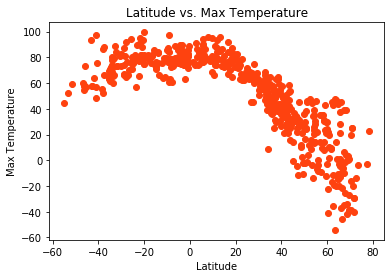

In [34]:
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_axis, y_axis_temp, color=color)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Max Temperature')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

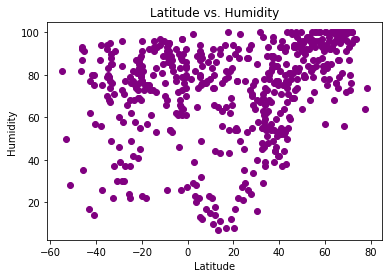

In [39]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
y_axis_humd = city_data_df['Humidity']
colour_humd = 'purple'
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_axis, y_axis_humd, c=colour_humd)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

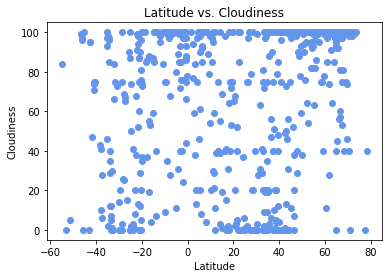

In [41]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
y_axis_cloud = city_data_df['Cloudiness']
color_cloud = 'cornflowerblue'
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_axis, y_axis_cloud, c=color_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

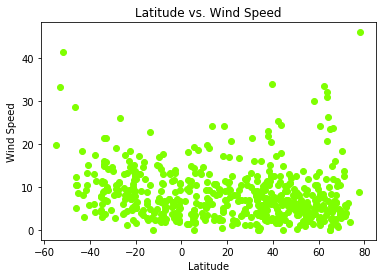

In [44]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
y_axis_wind = city_data_df['Wind Speed']
color_wind = 'chartreuse'
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_axis, y_axis_wind, c=color_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [106]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def line_regression(x_value, y_value):
    slope, intercept, r_value, p_value,  std_err = linregress(x_value, y_value)
    return slope, intercept, r_value, p_value, std_err

In [107]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0) i think i'll use .loc 
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,upernavik,72.7868,-56.1549,-14.06,97,99,6.31,GL,1675617154
6,kropotkin,45.4375,40.5756,37.08,69,100,10.27,RU,1675617156
7,egvekinot,66.3167,-179.1667,-21.35,87,100,11.74,RU,1675617156
9,lincoln,40.8000,-96.6670,48.15,55,0,5.75,US,1675616974
10,ponta do sol,32.6667,-17.1000,66.00,48,29,3.85,PT,1675617157


In [108]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taltal,-25.4000,-70.4833,74.71,68,0,6.08,CL,1675617154
2,punta arenas,-53.1500,-70.9167,51.91,50,0,33.38,CL,1675617000
3,antsohihy,-14.8796,47.9875,75.00,96,100,2.73,MG,1675617155
4,souillac,-20.5167,57.5167,78.96,83,96,11.72,MU,1675617155
5,vaini,-21.2000,-175.2000,79.47,76,60,7.70,TO,1675617155


###  Temperature vs. Latitude Linear Regression Plot

In [109]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
north_x = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp']
north_slope, north_int, north_r, north_p, north_std_err = line_regression(north_x, north_temp)
north_temp_regress = north_slope*north_x + north_int
north_temp_slope_display = round(north_slope, 2)
north_temp_int_display = round(north_int, 2)
temp_eq_display = f"{north_temp_slope_display}x + {north_temp_int_display}"

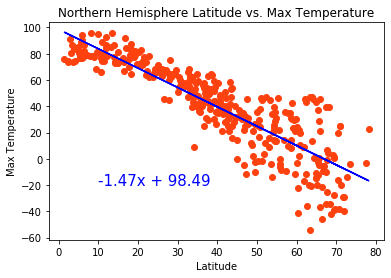

The r-value for Max Temperature in the NH: 0.76076614989796.


In [110]:
plt.scatter(north_x, north_temp, color=color)
plt.plot(north_x, north_temp_regress, color='b')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere Latitude vs. Max Temperature')
plt.annotate(temp_eq_display, (10, -20), fontsize=15, color='blue')
plt.show()
print(f'The r-value for Max Temperature in the NH: {north_r**2}.')

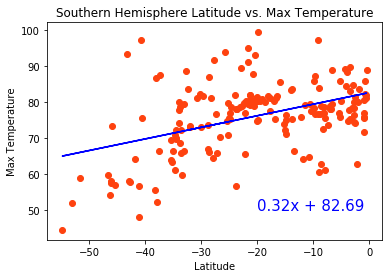

The r-value for Max Temp in the SH: 0.19849196082682075.


In [111]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
south_x = southern_hemi_df['Lat']
south_temp = southern_hemi_df['Max Temp']
south_slope, south_int, south_r, south_p, south_std_err = line_regression(south_x, south_temp)
south_temp_regress = south_slope*south_x + south_int
south_temp_slope_display = round(south_slope, 2)
south_temp_int_display = round(south_int, 2)
south_temp_eq_display = f"{south_temp_slope_display}x + {south_temp_int_display}"

plt.scatter(south_x, south_temp, color=color)
plt.plot(south_x, south_temp_regress, color='b')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere Latitude vs. Max Temperature')
plt.annotate(south_temp_eq_display, (-20, 50), fontsize=15, color='blue')
plt.show()
print(f'The r-value for Max Temp in the SH: {south_r**2}.')

**Discussion about the linear relationship:** We can see as the latitdue appraoches 0, the max temperature increases. This makes sense as lat --> 0, we approach the equator.  The regression line slopes for each hemisphere reflect this.

### Humidity vs. Latitude Linear Regression Plot

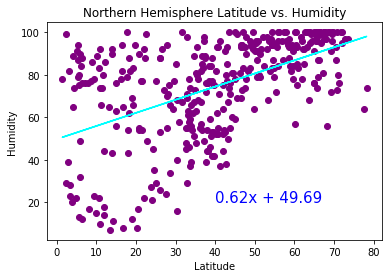

The r-value for the Humidity in the NH: 0.2692845419326334.


In [112]:
# Northern Hemisphere
# YOUR CODE HERE
colour_humd = 'purple'
north_humd = northern_hemi_df['Humidity']
north_slope_humd, north_int_humd, north_r_humd, north_p_humd, north_std_err_humd = line_regression(north_x, north_humd)
north_humd_regress = north_slope_humd*north_x + north_int_humd
north_humd_slope_display = round(north_slope_humd, 2)
north_humd_int_display = round(north_int_humd, 2)
humd_eq_display = f"{north_humd_slope_display}x + {north_humd_int_display}"

plt.scatter(north_x, north_humd, c=colour_humd)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Latitude vs. Humidity')
plt.plot(north_x, north_humd_regress, color='cyan')
plt.annotate(humd_eq_display, (40,20), fontsize=15, color='blue')
plt.show()
print(f'The r-value for the Humidity in the NH: {north_r_humd**2}.')

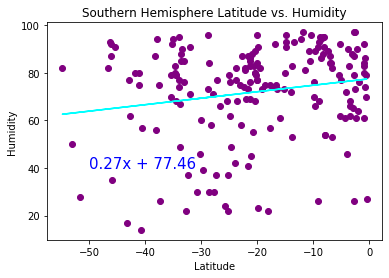

The r-value for the Humidity in the SH: 0.03322601850885516.


In [113]:
# Southern Hemisphere
# YOUR CODE HERE
south_humd = southern_hemi_df['Humidity']
south_slope_humd, south_int_humd, south_r_humd, south_p_humd, south_std_err_humd = line_regression(south_x, south_humd)
south_slope_humd, south_int_humd, south_r_humd, south_p_humd, south_std_err_humd = line_regression(south_x, south_humd)
south_humd_regress = south_slope_humd*south_x + south_int_humd
south_humd_slope_display = round(south_slope_humd, 2)
south_humd_int_display = round(south_int_humd, 2)
south_humd_eq_display = f"{south_humd_slope_display}x + {south_humd_int_display}"

plt.scatter(south_x, south_humd, c=colour_humd)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.plot(south_x, south_humd_regress, color='cyan')
plt.annotate(south_humd_eq_display, (-50,40), fontsize=15, color='blue')
plt.show()
print(f'The r-value for the Humidity in the SH: {south_r_humd**2}.')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

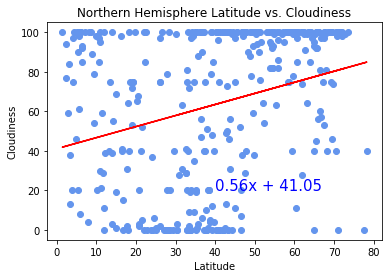

The r-value for the Cloudiness in the NH: 0.08087246356563392.


In [114]:
# Northern Hemisphere
# YOUR CODE HERE
colour_cloud = 'cornflowerblue'
north_cloud = northern_hemi_df['Cloudiness']
north_slope_cloud, north_int_cloud, north_r_cloud, north_p_cloud, north_std_err_cloud = line_regression(north_x, north_cloud)
north_cloud_regress = north_slope_cloud*north_x + north_int_cloud
north_cloud_slope_display = round(north_slope_cloud, 2)
north_cloud_int_display = round(north_int_cloud, 2)
cloud_eq_display = f"{north_cloud_slope_display}x + {north_cloud_int_display}"

plt.scatter(north_x, north_cloud, c=colour_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
plt.plot(north_x, north_cloud_regress, color='red')
plt.annotate(cloud_eq_display, (40,20), fontsize=15, color='blue')
plt.show()
print(f'The r-value for the Cloudiness in the NH: {north_r_cloud**2}.')

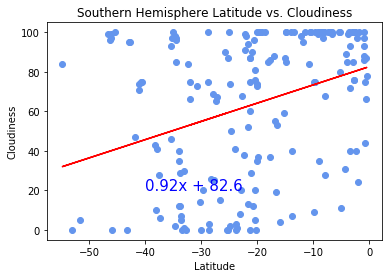

The r-value for the Cloudiness in the SH: 0.1144543445440366.


In [115]:
# Southern Hemisphere
# YOUR CODE HERE
south_cloud = southern_hemi_df['Cloudiness']
south_slope_cloud, south_int_cloud, south_r_cloud, south_p_cloud, south_std_err_cloud = line_regression(south_x, south_cloud)
south_cloud_regress = south_slope_cloud*south_x + south_int_cloud
south_cloud_slope_display = round(south_slope_cloud, 2)
south_cloud_int_display = round(south_int_cloud, 2)
south_cloud_eq_display = f"{south_cloud_slope_display}x + {south_cloud_int_display}"

plt.scatter(south_x, south_cloud, c=colour_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.plot(south_x, south_cloud_regress, color='red')
plt.annotate(south_cloud_eq_display, (-40,20), fontsize=15, color='blue')
plt.show()
print(f'The r-value for the Cloudiness in the SH: {south_r_cloud**2}.')

**Discussion about the linear relationship:** We can observe from the graoh and r-values above, that there's a positive correlation between cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

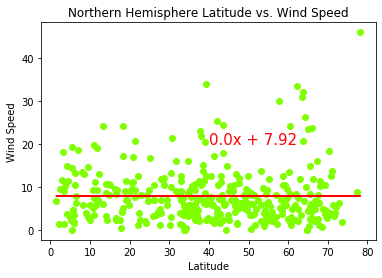

The r-value for the Wind Speed in the NH: 1.2943214524872645e-07.


In [119]:
# Northern Hemisphere
# YOUR CODE HERE
colour_wind = 'chartreuse'
north_wind = northern_hemi_df['Wind Speed']
north_slope_wind, north_int_wind, north_r_wind, north_p_wind, north_std_err_wind = line_regression(north_x, north_wind)
north_wind_regress = north_slope_wind*north_x + north_int_wind
north_wind_slope_display = round(north_slope_wind, 2)
north_wind_int_display = round(north_int_wind, 2)
wind_eq_display = f"{north_wind_slope_display}x + {north_wind_int_display}"

plt.scatter(north_x, north_wind, c=colour_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
plt.plot(north_x, north_wind_regress, color='red')
plt.annotate(wind_eq_display, (40,20), fontsize=15, color='red')
plt.show()
print(f'The r-value for the Wind Speed in the NH: {north_r_wind**2}.')

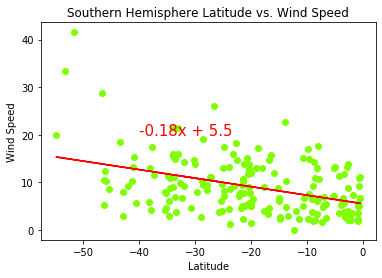

The r-value for the Wind Speed in the SH: 0.16213395733582084.


In [117]:
# Southern Hemisphere
# YOUR CODE HERE
south_wind = southern_hemi_df['Wind Speed']
south_slope_wind, south_int_wind, south_r_wind, south_p_wind, south_std_err_wind = line_regression(south_x, south_wind)
south_wind_regress = south_slope_wind*south_x + south_int_wind
south_wind_slope_display = round(south_slope_wind, 2)
south_wind_int_display = round(south_int_wind, 2)
south_wind_eq_display = f"{south_wind_slope_display}x + {south_wind_int_display}"

plt.scatter(south_x, south_wind, c=colour_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
plt.plot(south_x, south_wind_regress, color='red')
plt.annotate(south_wind_eq_display, (-40,20), fontsize=15, color='red')
plt.show()
print(f'The r-value for the Wind Speed in the SH: {south_r_wind**2}.')

**Discussion about the linear relationship:** We can observe in the northern hemisphere there's no correlation between wind speed and latitude. However, in the southern hemisphere, can observe a slight negative correlation. 